In [1]:
import random
import math
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving archive.zip to archive.zip
User uploaded file "archive.zip" with length 27794660 bytes


In [3]:
from zipfile import ZipFile
folder = "archive.zip"
with ZipFile(folder, 'r') as zip:
  zip.extractall()
  print("Folder data available!")

Folder data available!


In [4]:
rottenTomatoesData = pd.read_csv("rt_reviews.csv", names=['Freshness', 'Review'], encoding='Latin-1')

In [5]:
rottenTomatoesData.head()

,Freshness,Review
0,Freshness,Review
1,fresh,"Manakamana doesn't answer any questions, yet ..."
2,fresh,Wilfully offensive and powered by a chest-thu...
3,rotten,It would be difficult to imagine material mor...
4,rotten,Despite the gusto its star brings to the role...


In [6]:
rottenTomatoesData['Freshness'].count()
rottenTomatoesData['Review'].count()

480001

In [7]:
rottenTomatoesData.drop(index=0, inplace=True)

In [8]:
rottenTomatoesData.count()

Freshness    480000
Review       480000
dtype: int64

In [9]:
rottenTomatoesData['Freshness']=rottenTomatoesData['Freshness'].replace({'fresh': 1, 'rotten':0})
rottenTomatoesData

,Freshness,Review
1,1,"Manakamana doesn't answer any questions, yet ..."
2,1,Wilfully offensive and powered by a chest-thu...
3,0,It would be difficult to imagine material mor...
4,0,Despite the gusto its star brings to the role...
5,0,If there was a good idea at the core of this ...
...,...,...
479996,0,Zemeckis seems unable to admit that the motio...
479997,1,Movies like The Kids Are All Right -- beautif...
479998,0,Film-savvy audiences soon will catch onto Win...
479999,1,An odd yet enjoyable film.


In [10]:
rottenTomatoesData.shape

(480000, 2)

In [11]:
rottenTomatoesData.describe()

,Freshness
count,480000.000000
mean,0.500000
std,0.500001
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [12]:
rottenTomatoesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480000 entries, 1 to 480000
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Freshness  480000 non-null  int64 
 1   Review     480000 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.3+ MB


In [13]:
# Dataset Split into 70:15:15 percentage - training:test:validation 

def split(data, eighty, ten):
    first = int((eighty*len(data))/100)
    second = int(((eighty+ten)*len(data))/100)
    return data[:first], data[first:second], data[second:]

trainData, testData, validationData = split(rottenTomatoesData, 70, 15)       
trainData.head()

,Freshness,Review
1,1,"Manakamana doesn't answer any questions, yet ..."
2,1,Wilfully offensive and powered by a chest-thu...
3,0,It would be difficult to imagine material mor...
4,0,Despite the gusto its star brings to the role...
5,0,If there was a good idea at the core of this ...


In [14]:
np.random.seed(0)

**For Taining Data:**

In [15]:
trainData.groupby('Freshness').count()

,Review
Freshness,
0,167705
1,168295


In [16]:
print("For Training Data: ")
print("Number of Positive reviews: ", len(trainData[trainData['Freshness']==1]))
print("Number of Negative reviews: ", len(trainData[trainData['Freshness']==0]))
  
print("Probablity of positive reviews: ", len(trainData[trainData['Freshness']==1]) / len(trainData))
print("Probablity of negative reviews: ", len(trainData[trainData['Freshness']==0]) / len(trainData))

For Training Data: 
Number of Positive reviews:  168295
Number of Negative reviews:  167705
Probablity of positive reviews:  0.5008779761904761
Probablity of negative reviews:  0.4991220238095238


In [17]:
# cleansing data
trainData = trainData.reindex(np.random.permutation(trainData.index))
trainData.columns = trainData.columns.str.strip()
trainData.columns = trainData.columns.str.replace(r"[^a-zA-Z\d\_]+", "", regex = True)
trainData = trainData.replace(["' ", " '",";",":","=","\+","<", ">", "\?", "!", "\\\\", "@", "#", "$", "\*", "%", ",", "\.", "\(", "\)", "\[", "\]", "\{", "\}", "\"", "/br"], "", regex = True)

In [18]:
trainData.head()

,Freshness,Review
96959,0,a trial to endure
19700,1,In a career that has seen actor Phillip Seymo...
6861,0,It's mostly all doom and gloom Fans of Baumba...
261927,0,This is one karate chop too manymaster Morita...
34661,1,I had a pretty excellent time


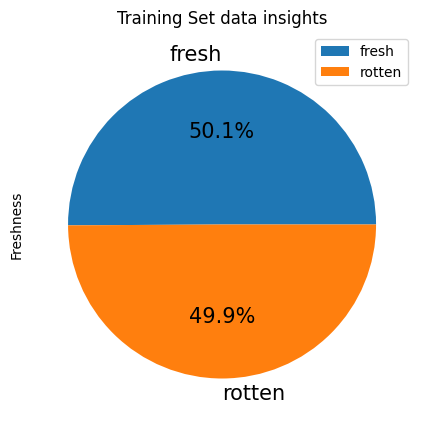

In [19]:
trainData['Freshness'].value_counts().plot(kind='pie', legend=True, labels=['fresh', 'rotten'], autopct='%1.1f%%', fontsize=15, figsize=[5,5])
plt.title('Training Set data insights')
plt.show()

**For Test Data:**

In [20]:
testData.groupby('Freshness').count()
print("For Test Data: ")
print("Number of Positive reviews: ", len(testData[testData['Freshness']==1]))
print("Number of Negative reviews: ", len(testData[testData['Freshness']==0]))

print("Probablity of positive reviews: ", len(testData[testData['Freshness']==1]) / len(testData))
print("Probablity of negative reviews: ", len(testData[testData['Freshness']==0]) / len(testData))

For Test Data: 
Number of Positive reviews:  35853
Number of Negative reviews:  36147
Probablity of positive reviews:  0.49795833333333334
Probablity of negative reviews:  0.5020416666666667


In [21]:
# cleansing data
testData = testData.reindex(np.random.permutation(testData.index))
testData.columns = testData.columns.str.strip()
testData.columns = testData.columns.str.replace(r"[^a-zA-Z\d\_]+", "", regex = True)
testData = testData.replace(["' ", " '",";",":","=","\+","<", ">", "\?", "!", "\\\\", "@", "#", "$", "\*", "%", ",", "\.", "\(", "\)", "\[", "\]", "\{", "\}", "\"", "/br"], "", regex = True)

In [24]:
testData.head()

,Freshness,Review
375844,0,Whatever Works isn't a good Woody Allen movie...
336262,1,It's a reunion that finds the old friends gra...
358212,0,The profound weaknesses of the film are manif...
336761,1,A frolicsome comedy in which two Englishmen e...
384687,0,The Lovely Bones has been fashioned as a holi...


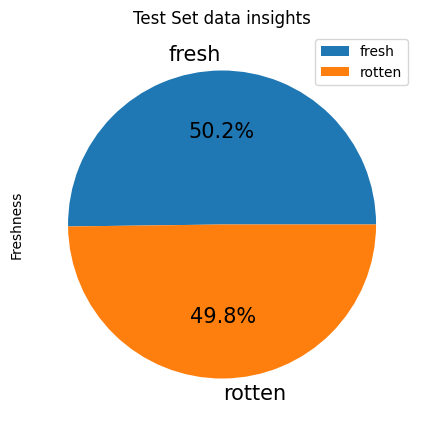

In [25]:
testData['Freshness'].value_counts().plot(kind='pie', legend=True, labels=['fresh', 'rotten'], autopct='%1.1f%%', fontsize=15, figsize=[5,5])
plt.title('Test Set data insights')
plt.show()

**For Validation Data**

In [26]:
validationData.groupby('Freshness').count()
print("For Validation Data: ")
print("Number of Positive reviews: ", len(validationData[validationData['Freshness']==1]))
print("Number of Negative reviews: ", len(validationData[validationData['Freshness']==0]))

print("Probablity of positive reviews: ", len(validationData[validationData['Freshness']==1]) / len(validationData))
print("Probablity of negative reviews: ", len(validationData[validationData['Freshness']==0]) / len(validationData))

For Validation Data: 
Number of Positive reviews:  35852
Number of Negative reviews:  36148
Probablity of positive reviews:  0.49794444444444447
Probablity of negative reviews:  0.5020555555555556


In [27]:
# cleansing data
validationData = validationData.reindex(np.random.permutation(validationData.index))
validationData.columns = validationData.columns.str.strip()
validationData.columns = validationData.columns.str.replace(r"[^a-zA-Z\d\_]+", "", regex = True)
validationData = validationData.replace(["' ", " '",";",":","=","\+","<", ">", "\?", "!", "\\\\", "@", "#", "$", "\*", "%", ",", "\.", "\(", "\)", "\[", "\]", "\{", "\}", "\"", "/br"], "", regex = True)

In [28]:
validationData.head()

,Freshness,Review
474779,1,It looks and feels the part without ever over...
440730,1,Fierce glaring and unforgettable
469153,1,As a 3-D film Journey to the Center of the Ea...
464114,1,The film like its main subject is a quiet exe...
468530,1,a lively children's adventure


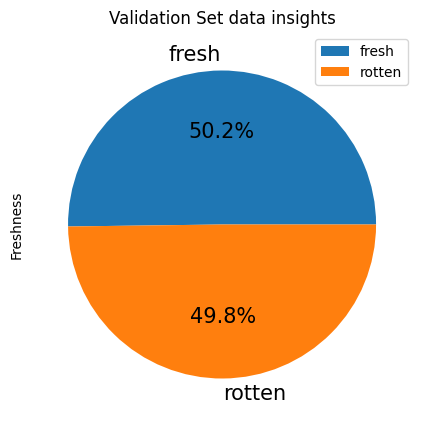

In [29]:
validationData['Freshness'].value_counts().plot(kind='pie', legend=True, labels=['fresh', 'rotten'], autopct='%1.1f%%', fontsize=15, figsize=[5,5])
plt.title('Validation Set data insights')
plt.show()

In [30]:
print("Word Length: ")
allWords = []
def calculateWordCount(trainData, freshness):
    wordlist = []
    for i in range(1,len(trainData)):
        allWords.extend(list(trainData['Review'][i].lower().split()))
        if(trainData['Freshness'][i] == freshness):
            wordlist.extend(list(trainData['Review'][i].lower().split()))
    return Counter(wordlist), Counter(allWords)

freshWordCount, wordCount = calculateWordCount(trainData, 1)

rottenWordCount, wordCounts = calculateWordCount(trainData, 0)

print("Word count: ",len(wordCount))
print("Fresh word count: ", len(freshWordCount))
print("Rotten word count: ", len(rottenWordCount))

Word Length: 
Word count:  133747
Fresh word count:  92359
Rotten word count:  88332


In [31]:
copyofwordCount = wordCount.copy()

print("After removing words that are repeated less than 5 times.")

for word in copyofwordCount:
    if(wordCount[word]<5):
        del wordCount[word]
    if word in freshWordCount and freshWordCount[word] <5:
            del freshWordCount[word] 
    if word in rottenWordCount and rottenWordCount[word] <5:
            del rottenWordCount[word]

print("Word count: ",len(wordCount))
print("Fresh word count: ", len(freshWordCount))
print("Rotten word count: ", len(rottenWordCount))

After removing words that are repeated less than 5 times.
Word count:  39584
Fresh word count:  27498
Rotten word count:  27966


In [32]:
def findProbability(wcount, dataLength, smoothingOrNotSmoothing):             
    if smoothingOrNotSmoothing == 0:
        #no smoothing
        return wcount/dataLength
    if smoothingOrNotSmoothing==1:
        #smoothing
        prob = (wcount+1)/(dataLength+len(wordCount))
        return prob

probabilityWord = dict()
probabilityWord_given_positive = dict()
probabilityWord_given_negative = dict()

# finding probabilities without smoothing, P[“the”] = num of documents containing ‘the’ / num of all documents

for word in wordCount:

    probabilityWord[word] = findProbability(wordCount[word], len(trainData), 0) 

    if word == 'the':
      print("Word: ", word, ", Count: ", wordCount[word],", Probability: ", probabilityWord[word])

    if word in freshWordCount:
        # P(word|Positive) = # of positive documents containing “word” / num of all positive review documents
        probabilityWord_given_positive[word] = findProbability(freshWordCount[word], len(trainData[trainData['Freshness']==1]), 0)
        if word == 'the':
            print("Probablity ['", word, "'| Positive] : ",probabilityWord_given_positive[word])

    if word in rottenWordCount:
        # P(word|Negative) = # of negative documents containing “word” / num of all negative review documents
        probabilityWord_given_negative[word] = findProbability(rottenWordCount[word], len(trainData[trainData['Freshness']==0]), 0)

Word:  the , Count:  380229 , Probability:  1.1316339285714285
Probablity [' the '| Positive] :  1.1402893728274757


In [33]:
def probabilityOfWord(index, smoothingFactor):
    reviews = set(arraySet['Review'][index].lower().split())
    probabilityPositive_givenWord = dict()
    probabilityNegative_givenWord = dict()
    noPositive = 0.00
    noNegative = 0.00
    for word in reviews:
        if word in probabilityWord:
            if word not in probabilityWord_given_positive:
                noNegative = 0
            elif word not in probabilityWord_given_negative:
                noPositive = 0
            else:
                if smoothingFactor == 0:
                    noPositive += math.log(probabilityWord_given_positive[word])
                    noNegative += math.log(probabilityWord_given_negative[word])
                else:
                    noPositive += math.log(probabilityWord_given_positive_smooth[word])
                    noNegative += math.log(probabilityWord_given_negative_smooth[word])
    # calculating P(Freshness|Word)
    probabilityPositive_givenWord[index] = pow(math.e, noPositive) * len(trainData[trainData['Freshness']==1]) / len(trainData) 
    probabilityNegative_givenWord[index] = pow(math.e, noNegative) * len(trainData[trainData['Freshness']==0]) / len(trainData)
    if(probabilityPositive_givenWord[index] < probabilityNegative_givenWord[index]):
        return 0
    else:
        return 1


testArray = np.array_split(testData, 6)
firstAccuracy = []
print("With no smoothing: ")

for arraySet in testArray: 
    count = 0
    predictions = []
    
    for index in arraySet.index:
        predictions.append(probabilityOfWord(index, 0))
         
    arraySet['prediction'] = predictions
                                                                        
    for index in arraySet.index:
        if arraySet['Freshness'][index] == arraySet['prediction'][index]:
            count = count + 1
                                            
    accuracy = count / len(arraySet)
    firstAccuracy.append(accuracy)
    print ("Test Data Accuracy: ",100*accuracy," %")

With no smoothing: 
Test Data Accuracy:  75.25  %
Test Data Accuracy:  75.05833333333334  %
Test Data Accuracy:  75.56666666666668  %
Test Data Accuracy:  75.925  %
Test Data Accuracy:  75.81666666666666  %
Test Data Accuracy:  75.075  %


In [34]:
probabilityWord_given_positive_smooth = dict()
probabilityWord_given_negative_smooth = dict()

# finding probabilities with smoothing
for word in wordCount:                        
    if word in freshWordCount:
        probabilityWord_given_positive_smooth[word] = findProbability(freshWordCount[word], len(trainData[trainData['Freshness']==1]), 1)  
        
    if word in rottenWordCount:
        probabilityWord_given_negative_smooth[word] = findProbability(rottenWordCount[word], len(trainData[trainData['Freshness']==0]), 1) 

In [36]:
testArray = np.array_split(testData, 6)
secondAccuracy = []
print("With smoothing: ")

for arraySet in testArray: 
    count = 0
    predictions = []
    
    for index in arraySet.index:
        predictions.append(probabilityOfWord(index,1))
         
    arraySet['prediction'] = predictions
                                                                        
    for index in arraySet.index:
        if arraySet['Freshness'][index] == arraySet['prediction'][index]:
            count = count + 1
                                            
    accuracy = count / len(arraySet)
    secondAccuracy.append(accuracy)
    print ("Test Data Accuracy: ",100*accuracy," %")

With smoothing: 
Test Data Accuracy:  75.25  %
Test Data Accuracy:  75.09166666666667  %
Test Data Accuracy:  75.58333333333334  %
Test Data Accuracy:  75.89166666666667  %
Test Data Accuracy:  75.80833333333334  %
Test Data Accuracy:  75.05833333333334  %


In [47]:
normal = 0
smoothing = 0

for i in range(len(firstAccuracy)):
    if (firstAccuracy[i] > secondAccuracy[i]): 
        normal += 1
    else: 
        smoothing += 1

if(smoothing >= normal): 
    print("Accuracy is more with smoothing!")
else: 
    print("Accuracy is more with no smoothing!")

Accuracy is more with smoothing!


In [48]:
probability_posi_given_word = dict() 
probability_nega_given_word = dict()

for word in wordCount:
    if word in freshWordCount:
        probability_posi_given_word[word] = (probabilityWord_given_positive[word] * len(trainData[trainData['Freshness']==1])) / probabilityWord[word]
    if word in rottenWordCount:
        probability_nega_given_word[word] = (probabilityWord_given_negative[word] * len(trainData[trainData['Freshness']==0])) / probabilityWord[word]
      
def sorting(dictionary, n):
    temp = dictionary.copy()
    disctionaryWithNoValues = dict()
    for i in range(n):
        maxkey = max(temp, key=temp.get, default=0.0)
        disctionaryWithNoValues[maxkey] = float(temp[maxkey])
        del temp[maxkey]
    return disctionaryWithNoValues
    
print("Ten maximum common positive class words: \n", sorting(probability_posi_given_word, 10))
print("Ten maximum common negative class words: \n", sorting(probability_nega_given_word, 10))

Ten maximum common positive class words: 
 {'manakamana': 336000.0, 'kubo': 336000.0, 'deep-dive': 336000.0, 'hones': 336000.0, 'awkwafina': 336000.0, 'ralston': 336000.0, 'unadorned': 336000.0, 'undisputed': 336000.0, 'chopin': 336000.0, 'hirokazu': 336000.0}
Ten maximum common negative class words: 
 {'bargain-basement': 336000.00000000006, "hector's": 336000.0, 'unappealingly': 336000.0, 'choppily': 336000.0, 'perpetrator': 336000.0, 'weak-kneed': 336000.0, 'derisive': 336000.0, 'lead-footed': 336000.0, 'closing-credit': 336000.0, 'fletch': 336000.0}


In [50]:
testArray = np.array_split(validationData, 1)
finalAccuracy = []
print("Accuracy of my algorithm: ")

for arraySet in testArray: 
    count = 0
    predictions = []
    
    for index in arraySet.index:
        predictions.append(probabilityOfWord(index,1))
         
    arraySet['prediction'] = predictions
                                                                        
    for index in arraySet.index:
        if arraySet['Freshness'][index] == arraySet['prediction'][index]:
            count = count + 1
                                            
    accuracy = count / len(arraySet)
    finalAccuracy.append(accuracy)
    print (int(100*accuracy)," %")


Accuracy of my algorithm: 
75  %
